
# Shark attacks during summer vs. other season

## Obtaining the data and checking the information

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("data/attacks.csv", encoding='cp1252')# due to a error of encoding we include which one we need to include

In [3]:
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
14797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning process

In [4]:
"""During this stage we gonna clear up all the data is not neccesary for the research as well as the empty values,
for then, filtering by year 1946"""

'During this stage we gonna clear up all the data is not neccesary for the research as well as the empty values,\nfor then, filtering by year 1946'

In [5]:
import src.cleaning as clean

In [6]:
"""Importing the functions for cleaning: the first one is cleaning the columns, second duplicates and nan values,
to continue with removing the years out of the hypothesis and cleaning and filtering countries"""

'Importing the functions for cleaning: the first one is cleaning the columns, second duplicates and nan values,\nto continue with removing the years out of the hypothesis and cleaning and filtering countries'

In [7]:
df = clean.column_na(df) # cleaning columns

In [8]:
df = clean.drop_duplicates(df) # dropping duplicates and NaN values

In [9]:
df = clean.year_1946(df) # removing the years before 1946

/Users/skyfly/Desktop/myIH/project1/project_shark/src/cleaning.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].astype('str')
/Users/skyfly/Desktop/myIH/project1/project_shark/src/cleaning.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Year'].map(lambda x: x.rstrip('.0'))
/Users/skyfly/Desktop/myIH/project1/project_shark/src/cleaning.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [10]:
df = clean.clean_country(df) # removing whitespaces and lower-case

In [11]:
df = clean.replace_country_values(df) # replacing some countries which wouldn't match with df-country_list

## Preparing data for analysis

### Obtaining a list of all the countries with latitude to determine wether are from the north or south.

In [12]:
"""Obtaining a dataframe from a csv file with the list of countries and their coordinates"""

'Obtaining a dataframe from a csv file with the list of countries and their coordinates'

In [13]:
l_country= pd.read_csv('data/list_country.csv') 
l_country.latitude.isna().sum() # Obtaining a dataframe with the list of countries and their coordinates we can find there's a NaN value

1

In [14]:
l_country.dropna(how= 'any',inplace= True) # so, we remove the NaN row as we can't say if North or South

In [15]:
import src.analysis as analysis

In [16]:
l_country = analysis.list_country_hemisphere(l_country) # filtering countries wether are north or south

In [17]:
south_list = analysis.cleaning_ref(l_country) 

In [18]:
"""create a list of southern countries"""

'create a list of southern countries'

### Combination of both df to obtain a concatenate df within the cases and their hemisphere

In [19]:
import src.combination as comb

In [20]:
"""we create another function to combine and concatenate df and the south list created before"""

'we create another function to combine and concatenate df and the south list created before'

In [21]:
df_concat = comb.combine_ref_df(df, south_list) 

In [22]:
df_concat

,Date,Year,hemisphere
Country,,,
united states,25-Jun-2018,2018,north
united states,18-Jun-2018,2018,north
united states,09-Jun-2018,2018,north
australia,08-Jun-2018,2018,south
mexico,04-Jun-2018,2018,north
...,...,...,...
south africa,07-Jan-1946,1946,south
australia,05-Jan-1946,1946,south
south africa,01-Jan-1946,1946,south


In [23]:
"""As a result of the combination we get a new df creating a dictionary of list to merge by index
(set_index as Country) the hemisphere """

'As a result of the combination we get a new df creating a dictionary of list to merge by index\n(set_index as Country) the hemisphere '

## Creating the seasons according to the hemisphere

In [24]:
import src.concat as cct
"""In the first function we get the month with regex (thanks to David V), while 2 and 3 function we create 2 subsets for each
hemisphere to get the season"""

'In the first function we get the month with regex (thanks to David V), while 2 and 3 function we create 2 subsets for each\nhemisphere to get the season'

In [25]:
df_concat= cct.concat_month(df_concat)

In [26]:
df_south = df_concat.loc[df_concat['hemisphere'] == "south"] #creating a subset for southern countries

In [27]:
df_north = df_concat.loc[df_concat['hemisphere'] == "north"] #creating a subset for northern countries

In [28]:
df_south['season'] = df_south['month'].map(lambda month:cct.south_season(month)) 
#creating a new column iterating in between the month and season according to the hemisphere

/var/folders/8p/zy_zh8_j0k926kzhhbp39j9c0000gn/T/ipykernel_65675/116206850.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_south['season'] = df_south['month'].map(lambda month:cct.south_season(month))


In [29]:
df_north['season'] = df_north['month'].map(lambda month:cct.north_season(month))
#creating a new column iterating in between the month and season according to the hemisphere

/var/folders/8p/zy_zh8_j0k926kzhhbp39j9c0000gn/T/ipykernel_65675/3084720278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north['season'] = df_north['month'].map(lambda month:cct.north_season(month))


In [30]:
df_north.sample()

,Date,Year,hemisphere,month,season
Country,,,,,
united states,05-Jul-2007,2007,north,Jul,Summer


In [31]:
df_south.sample()

,Date,Year,hemisphere,month,season
Country,,,,,
australia,14-Jul-2017,2017,south,Jul,Winter


In [32]:
x= df_north.hemisphere.count() - df_south.hemisphere.count()
print(f"The total amount of attacks found in the north is {df_north.hemisphere.count()}, meanwhile, in the south is {df_south.hemisphere.count()}")
print (f"This gives a difference os {x} more in the North")

The total amount of attacks found in the north is 2211, meanwhile, in the south is 1638
This gives a difference os 573 more in the North


## Extracting the data

In [33]:
import src.graphs as gp
import matplotlib as plt
import seaborn as sns

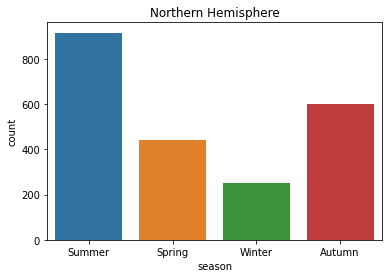

In [34]:
graph_north = gp.extract_data_north(df_north);

In [35]:
"""Checking the data from the northern hemisphere, can be seen a relevant increment in summer in compare the other season"""

'Checking the data from the northern hemisphere, can be seen a relevant increment in summer in compare the other season'

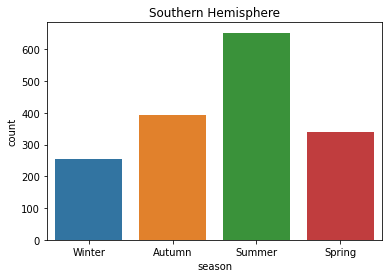

In [36]:
graph_south = gp.extract_data_sout(df_south)

In [37]:
"""Checking the data from the southern hemisphere, can be also seen a relevant increment in summer in compare the other season"""

'Checking the data from the southern hemisphere, can be also seen a relevant increment in summer in compare the other season'

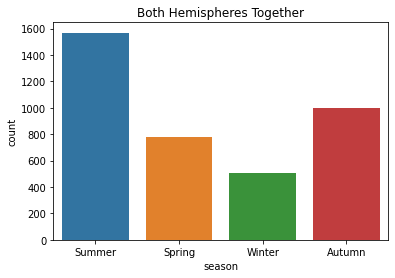

In [38]:
graph_together = gp.extract_data_together(df_north, df_south)

In [39]:
"""putting all together can confirm worldwide the increase of the attacks in summer"""

'putting all together can confirm worldwide the increase of the attacks in summer'

## Saving graphs

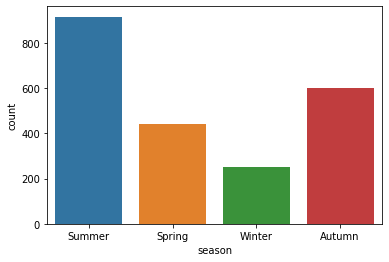

In [40]:
north = sns.countplot(x="season", data=df_north, label= "Northern hemisphere");
north.figure.savefig("North.jpg", dpi=1000)

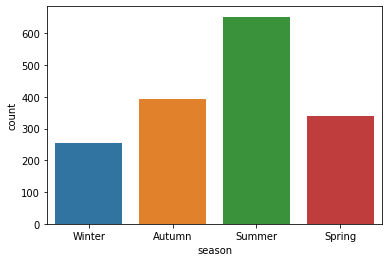

In [41]:
south = sns.countplot(x="season", data=df_south, label= "Southern hemisphere");
south.figure.savefig("South.jpg", dpi=1000)